In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [ ]:
# For the following problems, use python to simulate the problem and calculate an experimental probability, 
# then compare that to the theoretical probability.


In [ ]:
#     A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
# Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions 
# concerning the probability of cars waiting at the drive-up window.


In [47]:
# First initialize a poisson distribution
lamb = 2
cars_dist = stats.poisson(lamb)

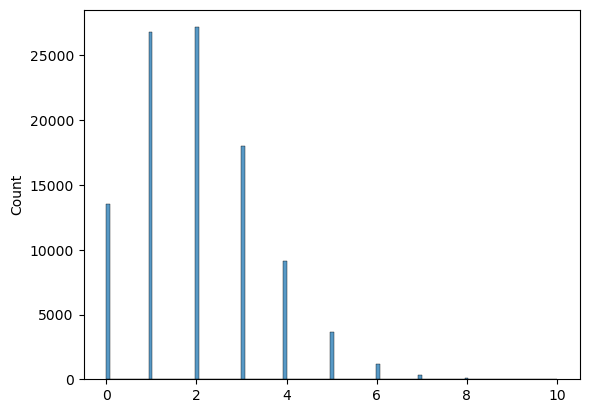

In [50]:
# Chart the experimental probability
car_values = cars_dist.rvs(100_000)
sns.histplot(car_values)
plt.show()

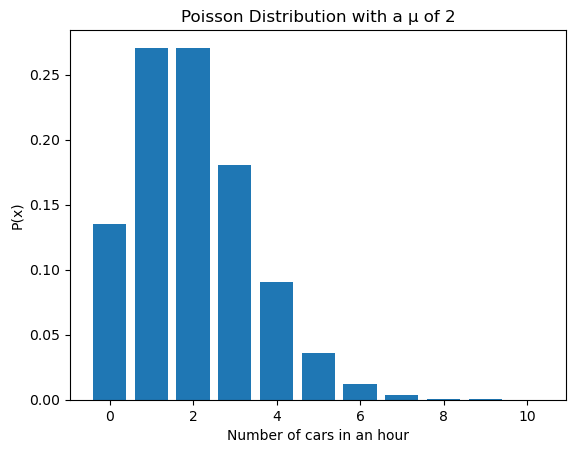

In [89]:
# A better way
μ = 2
x = np.arange(0,11)
y = stats.poisson(μ).pmf(x)

plt.bar(x,y)
plt.title('Poisson Distribution with a μ of 2')
plt.xlabel('Number of cars in an hour')
plt.ylabel('P(x)')
plt.show()

In [51]:
# Experimental probability of 0 cars in the noon hour
(car_values == 0).mean()

0.13527

In [19]:
#         What is the probability that no cars drive up in the noon hour?
cars_dist.pmf(0)
# OR stats.poisson(μ).pmf(0)
# OR stats.poisson.pmf(0,μ)

0.1353352832366127

In [21]:
#         What is the probability that 3 or more cars come through the drive through?
cars_dist.sf(2)

0.32332358381693654

In [22]:
#         How likely is it that the drive through gets at least 1 car?
cars_dist.sf(0)

0.8646647167633873

In [ ]:
#     Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation 
# of .3. Calculate the following:

In [91]:
mu = 3.0
sigma = .3
grades_dist = stats.norm(mu, sigma)
grades_dist

In [24]:
#         What grade point average is required to be in the top 5% of the graduating class?
grades_dist.isf(.05)

3.4934560880854417

In [25]:
#         What GPA constitutes the bottom 15% of the class?
grades_dist.isf(.85)
# OR grades_dist.ppf(.15)

2.689069983151863

In [31]:
#         An eccentric alumnus left scholarship money for students in the third decile from the bottom of 
# their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify 
# for this scholarship?
third_decile_min = round(grades_dist.isf(.8),3)  # OR .ppf(.3) - .ppf(.2)
third_decile_max = round(grades_dist.isf(.7),3)
# OR make a range: gpa_range = grades_dist.ppf([.2,.3])
print(f"Third decile GPA range is {third_decile_min} to {third_decile_max}.")
if third_decile_min <= 2.8 < third_decile_max: 
    print("2.8 qualifies for the scholarship.")
else: print("2.8 does not qualify for the scholarship.")

Third decile GPA range is 2.748 to 2.843.
2.8 qualifies for the scholarship.


In [32]:
#         If I have a GPA of 3.5, what percentile am I in?
### 95th percentile
grades_dist.cdf(3.5)

0.9522096477271853

In [3]:
#     A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 
# click-throughs. How likely is it that this many people or more click through?

# Sounds like a binomial distribution

n_trials = 4326
p_of_success = .02
click_thru_dist = stats.binom(n_trials, p_of_success)

click_thru_dist.sf(96)

0.13975823631416448

In [95]:
#     You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the 
# answer to each question.

#         What is the probability that at least one of your first 60 answers is correct?

# I will assume a uniform distribution of correct answers in the range, 0.00 - 1.00
# There are 101 possible answers (0.00-0.99 would be 100 possible answers)

n_trials = 60
p = 1/101

answer2_dist = stats.binom(n_trials, p)
answer2_dist.sf(0)

0.44955038406224

In [105]:
# started to figure out a simulation and have not completed

answer_dist = stats.randint(0,101)
answer_array = answer_dist.rvs(60)
answer_array
answer_bool = answer_array == 5
answer_bool.sum()
## Not Complete

0

In [112]:
#     The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 
# 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of 
# the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up 
# each day? How likely is it that it goes two days without getting cleaned up? All week?

# the distribution for visiting the break room is binomial since one of two possible outcomes will occur,
# and I'm assuming for this problem each student visiting the break room is an independent variable.  Also,
# there is a clear probability given for "success" of visiting the break room which is .9
# n = 3 * 22
# p = .9
# visit_dist = stats.binom(n,p)

# Whether a student cleans the break room also appears to be a binomial dist with the prob of succes: .03. 
# However, the number of trials for one day varies.  So... (much thinking occurred)

# Ahh. Rather, the probability of any one student both visiting the break room and cleaning it is .9 * .03 = .027.
# Now I have a probability of cleaning by 1 student, and I have 66 students (number of trials). So:

n = 3 * 22
p = .9 * .03
cleaning_dist = stats.binom(n,p)

# I want the probability that a room is cleaned on 1 day, so I have a value (1 student cleaning room), and
# I want the probability that the variable takes on a value >= 1, aka > 0 (discrete variable)
print(f"The prob of the break room getting cleaned on 1 day is {cleaning_dist.sf(0)}")

# To get the probability that the break room is cleaned in 2 or 5 days, I simply need to multiply the number
# of trials by the number of days
# For 2 days:
days = 2
n = 3 * 22 * days
two_day_cln_dist = stats.binom(n,p)
# I misread the question, so I just subtract from 1 to get the answer:
print(f"The prob of the break room not getting cleaned in 2 days is {1-two_day_cln_dist.sf(0)}")

# For 5 days:
days = 5
n = 3 * 22 * days
five_day_cln_dist = stats.binom(n,p)
# I misread the question, so I just subtract from 1 to get the answer:
print(f"The prob of the break room not getting cleaned in 5 days is {1-five_day_cln_dist.sf(0)}")

The prob of the break room getting cleaned on 1 day is 0.8357719040571372
The prob of the break room not getting cleaned in 2 days is 0.02697086749701816
The prob of the break room not getting cleaned in 5 days is 0.00011946406504648177


In [23]:
#     You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your 
# lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
# for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you 
# have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour 
# for lunch, and ignore travel time to and from La Panaderia.

# First let's make a normal distribution of the number of minutes it will take for me to get to the person taking
# orders:

mu = 15 * 2
sigma = 3 * 2
wait_time_dist = stats.norm(mu, sigma)

# I will need 2 minutes to order + 10 minutes to wait for the order. Then I still want
# 15 minutes to eat. If I assume a normal day with a 60 minute lunch hour, I need to have a wait time of 
# no more than: 60-15-10-2 = 33  minutes.  So, I have a value (33), I want the prob of <= to that value:

wait_time_dist.cdf(33)

0.6914624612740131

In [ ]:
#     Connect to the employees database and find the average salary of current employees, along with the 
# standard deviation. For the following questions, calculate the answer based on modeling the employees 
# salaries with a normal distribution defined by the calculated mean and standard deviation then compare 
# this answer to the actual values present in the salaries dataset.

#     Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", 
# remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your 
# .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database 
# like so:

# import pandas as pd
# import env

# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
# pd.read_sql('SELECT * FROM departments', url)

In [31]:
from env import host, user, password
def get_db_url(db_name, user=user, host=host, password=password):
    '''
    get_db_url accepts a database name, username, hostname, password 
    and returns a url connection string formatted to work with codeup's 
    sql database.
    Default values from env.py are provided for user, host, and password.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

connection_str = get_db_url('employees')
query = """
            SELECT *
            FROM salaries
            WHERE to_date > NOW()
        """
emp_df = pd.read_sql(query, connection_str)


In [113]:
emp_df.salary.mean()

72012.23585730705

In [114]:
emp_df.salary.std()

17309.99538025198

In [116]:
salary_dist = stats.norm(emp_df.salary.mean(), emp_df.salary.std())

answer = salary_dist.cdf(59999.99)
print(f"Using the normal distribution, the percent of current employees earning less than 60K is {round(answer*100, 2)}")

answer = 1 - (salary_dist.sf(80000)) - (salary_dist.cdf(64999.99))
print(f"Using the normal distribution, the percent of current employees earning between 65 and 80K is {round(answer*100, 2)}")
# OR np.diff(salary_dist.cdf([65000,80000]))

answer = salary_dist.sf(95000)
print(f"Using the normal distribution, the percent of current employees earning more than 95K is {round(answer*100, 2)}")


#         What do the top 5% of employees make?
# if you use the distribution:
print()
print("Using the normal distribution for this answer:")
print(f"The top 5% earn more than ${round(salary_dist.isf(.05),2)}")


Using the normal distribution, the percent of current employees earning less than 60K is 24.39
Using the normal distribution, the percent of current employees earning between 65 and 80K is 33.51
Using the normal distribution, the percent of current employees earning more than 95K is 9.21

Using the normal distribution for this answer:
The top 5% earn more than $100484.64


In [118]:
# Using the dataframe

print("Using the dataframe for these answers:")
#         What percent of employees earn less than 60,000?
percent_lessthan60K = (emp_df[emp_df.salary<60_000].salary.count()
                      / emp_df.salary.count())
print(f"The percent of current employees earning less than 60K is {round(percent_lessthan60K*100, 2)}")

#         What percent of employees earn more than 95,000?
percent_morethan95K = (emp_df[emp_df.salary>95_000].salary.count()
                      / emp_df.salary.count())
print(f"The percent of current employees earning more than 95K is {round(percent_morethan95K*100, 2)}")

#         What percent of employees earn between 65,000 and 80,000?
percent_btwn65_80K = (emp_df[(emp_df.salary>=65_000) & (emp_df.salary<=80_000)].salary.count()
                      / emp_df.salary.count())
print(f"The percent of current employees earning between 65 and 80K is {round(percent_btwn65_80K*100, 2)}")# if you use the dataframe: ...

five_percent = (emp_df.salary.count()*.05).astype(int)
salary_series = emp_df.salary.sort_values(ascending=False)
salary_df = pd.DataFrame(salary_series)
salary_df = salary_df.reset_index()
salary_df = salary_df.drop(columns='index')
# Using the data frame, I sorted the salaries from highest to lowest. Then I calculated 5% of the total count
# of salaries. I rounded that number to a whole number and put it in the variable five_percent (= 12006)
# I then pull the salary from the 12006th record (index starts at 0, so 12005).

print (f"The top 5% of earners earn >= to ${salary_df.iloc[five_percent-1][0]}")

Using the dataframe for these answers:
The percent of current employees earning less than 60K is 27.06
The percent of current employees earning more than 95K is 10.86
The percent of current employees earning between 65 and 80K is 32.52
The top 5% of earners earn >= to $104228
